# CSE 5520 Homework 1

| | |
|-|-|
| **Student** | Lynn Pepin ('Tristan Pepin')
|              | tmp13009 / 2079724
| **Due date** | 2021 / Sept / 7


This is Lynn Pepin's report for CSE 5520 homework 1. It is organized with code first, and then the microlab.

## 1. Hands-on Microlab

Let's create an interactive chart using `pygal`.

The file `lynnkit` will hold all the helper-functions and whatnot I use in this course. When the code is provided or trivial (e.g. a fibonacci generator), I don't include it in the notebook.

### 1.1 Plotting with PyGal

In [1]:
import pygal as pg
import lynnkit as lk

In [2]:
# generator for our fib vals
fib_generator = lk.fibgen()
fib_vals = [next(fib_generator) for _ in range(1000)]
print("Some of our vibonacci values", fib_vals[:10])

Some of our vibonacci values [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [3]:
# render our plot to an svg
bar_chart = pg.Bar()
bar_chart.add('Fibonacci', fib_vals[:10])
bar_chart.render_to_file('hw1_f1.svg')

### 1.2. Plotting with Plotly

In [4]:
import pandas as pd
import plotly.graph_objects as go

In [5]:
# load the data
df = pd.read_csv('finance-charts-apple.csv')
df.columns = [col.replace('AAPL', '') for col in df.columns]

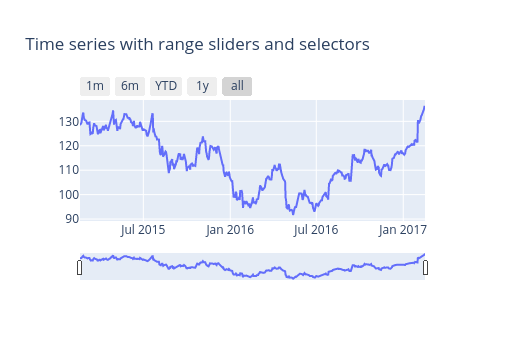

In [7]:
# create plotly figure
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = df['Date'],
        y = df['.High']
    )
)

# update figure title
fig.update_layout(
    title_text="Time series with range sliders and selectors"
)

# add range slider
fig.update_layout(
    xaxis = dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

### 1.3 Host a graph with Dash

This is a tool by the makers of Plotly that provides a server for visualization in the browser.

In [8]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
external_stylesheets = ['bWLwgP.css']

In [9]:
# instantiate app
app = dash.Dash(
    __name__,
    external_stylesheets = external_stylesheets
)

In [10]:
# create data
fruits  = ['Apples', 'Oranges', 'Bananas', 'Apples', 'Oranges', 'Bananas']
amounts = [4, 1, 2, 2, 4, 5]
cities  = ['SF', 'SF', 'SF', 'Montreal', 'Montreal', 'Montreal']

df = pd.DataFrame(
    {
        'Fruit'  : fruits,
        'Amount' : amounts,
        'City'   : cities
    }
)

In [11]:
# instantiate figure
fig = px.bar(
    df,
    x='Fruit', y='Amount', color='City', barmode='group'
)

In [12]:
# populate app
app.layout = html.Div(
    children=[
        html.H1(children='Fruits'),
        html.Div(children=''' Fruits Amounts in San Francisco and Montreal. '''),
        dcc.Graph(
            id='example-graph',
            figure=fig
        )
    ])

In [13]:
# run server
app.run_server(port=8050, host='localhost')

Dash is running on http://localhost:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:8050/ (Press CTRL+C to quit)


## 2. Screenshots of running code

### 2.1. Pygal

PyGal screenshot:

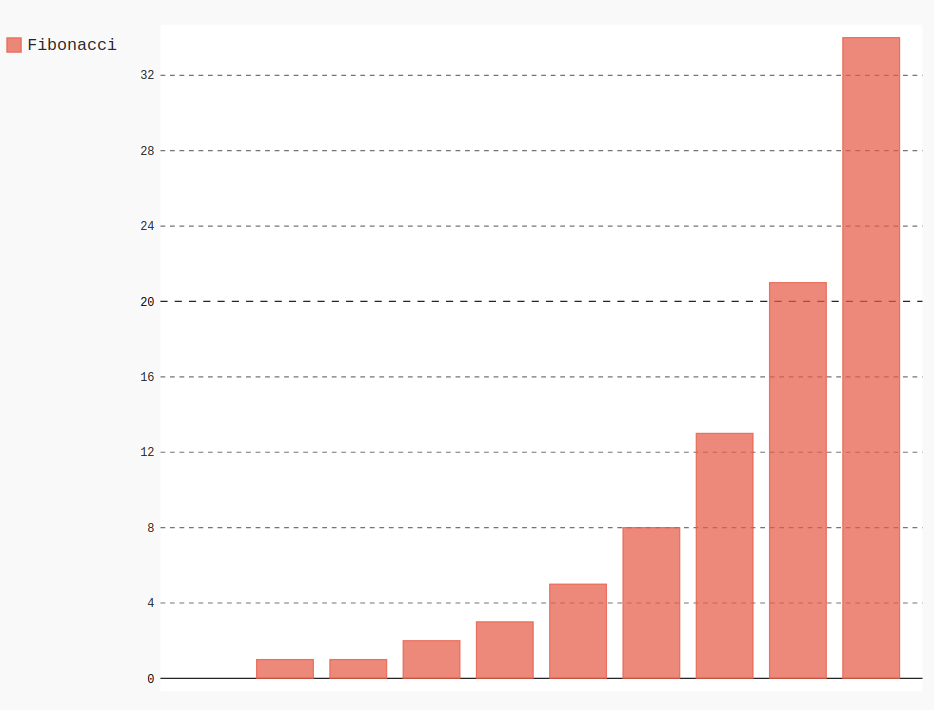

### 2.2. Plotly

Plotly screenshot:

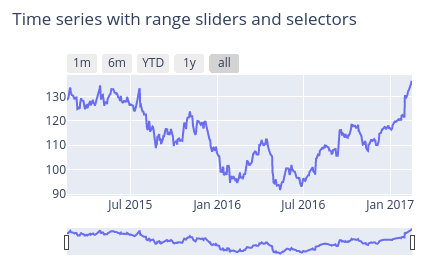

### 2.3. Dash

Dash screenshot:

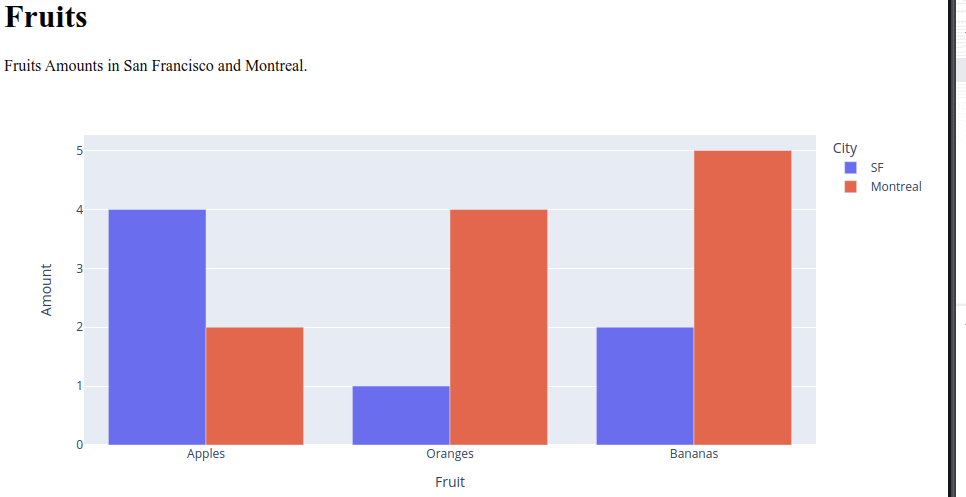

# Addendum: Code from `lynnkit`

I put extra code into `lynnkit`. I wrote a very good generator for fibonacci here, which is well documented and avoids memory swapping. Here is a copy of the pertinent code:

```
def fibgen():
    """Provides a generator yielding the fibonacci sequence
    
    :yields: int
    :returns: An iterator which yields the i-th value of the Fibonacci sequence
        for each i-th call of next() on an instance of fibgen
    :rtype: Iterator[int]

    >>> f = fibgen()
    >>> next(f)
    0
    >>> next(f)
    1
    >>> next(f)
    1
    >>> next(f)
    2
    >>> next(f)
    3
    """
    
    vals = [0, 1]
    ii = 0
    while True:
        yield vals[ii%2]
        vals[ii%2] += vals[(ii+1)%2]
        ii += 1
```